# 讀標註完的

In [1]:
from os import listdir
from os.path import isfile, isdir, join
import json 
path='./TrainData/labeled/'

files = listdir(path)

all_path=[]
for f in files:
    if f.split('.')[-1]!='png':
        continue
    fullpath=path+f
    if isfile(fullpath):
        all_path.append(fullpath)
    
        
all_path 

['./TrainData/labeled/0298.png',
 './TrainData/labeled/0267.png',
 './TrainData/labeled/0273.png',
 './TrainData/labeled/0065.png',
 './TrainData/labeled/0071.png',
 './TrainData/labeled/0059.png']

{'id': '0298', 'mask': [[[0, 0], [0, 33], [32, 33], [33, 32], [34, 32], [32, 30], [32, 28], [31, 27], [31, 24], [30, 23], [30, 14], [34, 10], [35, 10], [36, 9], [37, 9], [38, 8], [37, 7], [37, 6], [34, 3], [34, 1], [33, 0]], [[2, 0], [1, 1], [0, 1], [0, 33], [32, 33], [33, 32], [34, 32], [32, 30], [32, 28], [31, 27], [31, 24], [30, 23], [30, 19], [29, 18], [29, 17], [30, 16], [30, 14], [34, 10], [35, 10], [34, 9], [36, 7], [36, 5], [35, 4], [34, 4], [33, 3], [33, 2], [32, 1], [31, 1], [30, 2], [28, 2], [27, 1], [26, 1], [25, 0]], [[37, 10], [36, 11], [35, 11], [34, 12], [33, 12], [31, 14], [31, 22], [32, 23], [32, 26], [33, 27], [33, 30], [37, 30], [37, 27], [38, 26], [38, 18], [39, 17], [39, 15], [40, 14], [40, 13], [39, 12], [39, 11], [38, 10]], [[41, 14], [41, 15], [40, 16], [40, 19], [39, 20], [39, 33], [48, 33], [48, 30], [47, 29], [47, 20], [48, 19], [48, 18], [50, 16], [51, 16], [52, 15], [52, 14]], [[51, 17], [49, 19], [49, 20], [48, 21], [48, 26], [49, 27], [49, 33], [64, 33],

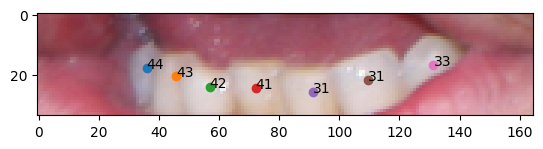

In [3]:
import matplotlib.pyplot as plt
import io
import cv2
import numpy as np 

all_mask=[]
for path in all_path:
    fig=cv2.imread(path)
    jpath=path.split('.')
    jpath[-1]='json'
    with open('.'.join(jpath)) as f:
        data=json.load(f)
    print(data)
    all_mask.append(data)
    plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))
    for i in range(len(data['mask'])):
        mask=np.array(data['mask'][i])
        if data['label'][i]!=-1:
            plt.text(np.mean(mask[:,0]), np.mean(mask[:,1]), data['label'][i])
            plt.scatter(np.mean(mask[:,0]), np.mean(mask[:,1]))

    break



In [29]:
from lib.Polygon import Polygon

a=Polygon(all_mask[0]['mask'][0])
a.box

[0, 38, 0, 33]

In [41]:
import json
import numpy as np
import cv2
import os
import sys

if sys.version_info[0] >= 3:
    unicode = str
# __author__ = 'hcaesar'

import io

# 实例的id，每个图像有多个物体每个物体的唯一id
global segmentation_id
segmentation_id = 0
# annotations部分的实现
def polyToanno(polygon_mask, image_id, category_id):
    annotations = [] #一幅图片所有的annotatons
    global segmentation_id
    # print(ann_count)
    # 对每个实例进行处理
    for i in range(len(polygon_mask)):
        
        polygon=Polygon(polygon_mask[i])
        
        annotation = {
            "segmentation": [],
            "area": abs(polygon.area),
            "iscrowd": 0,
            "image_id": image_id,
            "bbox": polygon.box,
            "category_id": category_id,
            "id": segmentation_id
        }
        # print(contour)
        # 求segmentation部分
        segmentation = polygon.points.ravel().tolist()
        if len(segmentation)<=4:
            continue
        annotation["segmentation"].append(segmentation)
        annotations.append(annotation)
        segmentation_id = segmentation_id + 1
    return annotations

class NumpyEncoder(json.JSONEncoder):
    """ Custom encoder for numpy data types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):

            return int(obj)

        elif isinstance(obj, (np.float_, np.float16, np.float32, np.float64)):
            return float(obj)

        elif isinstance(obj, (np.complex_, np.complex64, np.complex128)):
            return {'real': obj.real, 'imag': obj.imag}

        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()

        elif isinstance(obj, (np.bool_)):
            return bool(obj)

        elif isinstance(obj, (np.void)): 
            return None

        return json.JSONEncoder.default(self, obj)

In [39]:
tt=polyToanno([a.points], 1, 1)
tt

[{'segmentation': [[0,
    0,
    0,
    33,
    32,
    33,
    33,
    32,
    34,
    32,
    32,
    30,
    32,
    28,
    31,
    27,
    31,
    24,
    30,
    23,
    30,
    14,
    34,
    10,
    35,
    10,
    36,
    9,
    37,
    9,
    38,
    8,
    37,
    7,
    37,
    6,
    34,
    3,
    34,
    1,
    33,
    0]],
  'area': 1071.0,
  'iscrowd': 0,
  'image_id': 1,
  'bbox': [0, 38, 0, 33],
  'category_id': 1,
  'id': 0}]

In [43]:

# mask图像路径
block_mask_path = './TrainData/labeled/mask'
block_mask_files = os.listdir(block_mask_path)
# coco json保存的位置
jsonPath = "./TrainData/labeled/train.json"
annCount = 0
imageCount = 0
# 原图像的路径， 原图像和mask图像的名称是一致的。
path = './TrainData/labeled/image'
rgb_image_files = os.listdir(path)
with io.open(jsonPath, 'w', encoding='utf8') as output:
    # 那就全部写在一个文件夹好了
    # 先写images的信息
    output.write(unicode('{\n'))
    output.write(unicode('"images": [\n'))
    for image in rgb_image_files:
        
        output.write(unicode('{'))
        annotation = {
            "height": 512,
            "width": 512,
            "id": imageCount,
            "file_name": image
        }
        str_ = json.dumps(annotation, indent=4)
        str_ = str_[1:-1]
        if len(str_) > 0:
            output.write(unicode(str_))
            imageCount = imageCount + 1
        if (image == rgb_image_files[-1]):
            output.write(unicode('}\n'))
        else:
            output.write(unicode('},\n'))
    output.write(unicode('],\n'))
    # 接下来写cate
    output.write(unicode('"categories": [\n'))
    output.write(unicode('{\n'))
    categories = {
        "supercategory": "Building",
        "id": 1,
        "name": "Building"
    }
    str_ = json.dumps(categories, indent=4)
    str_ = str_[1:-1]
    if len(str_) > 0:
        output.write(unicode(str_))
    output.write(unicode('}\n'))
    output.write(unicode('],\n'))
# 写annotations
    output.write(unicode('"annotations": [\n'))
    for i in range(len(block_mask_files)):
        
        #       print(block_image)
       
        


        with open(os.path.join(block_mask_path, block_mask_files[i])) as f:
            data=json.load(f)


        block_anno = polyToanno(data['mask'], annCount, 1)
        
        
        for b in block_anno:
            #print (b)
            str_block = json.dumps(b, indent=4,cls=NumpyEncoder)
            str_block = str_block[1:-1]
            if len(str_block) > 0:
                output.write(unicode('{\n'))
                output.write(unicode(str_block))
                if ( b == block_anno[-1]):
                    output.write(unicode('}\n'))
                else:
                    output.write(unicode('},\n'))
        annCount = annCount + 1
    output.write(unicode(']\n'))
    output.write(unicode('}\n'))





In [26]:
block_mask_path = './TrainData/labeled/mask'
block_mask_files = os.listdir(block_mask_path)
block_mask_files

['2023-09-14-17:14:38.json', '0111.json']

In [ ]:
from lib.SMILE import SMILE


In [ ]:

from lib.SMILE import SMILE
import numpy as np
import json
from tqdm import tqdm, trange
now=1

times = 0
progress = tqdm(total=len(all_path))

for f in all_path:
    smile=SMILE(f,"")
    filename=str(now).zfill(4)
    smile.find_all_tooth()
    cv2.imwrite(f"{output_path}{filename}.png", smile.boximg)


    #plt.imshow(cv2.cvtColor(smile.boximg,cv2.COLOR_RGB2BGR))
    #plt.axis('on')
    #plt.savefig(f"mask/{filename}.png",bbox_inches='tight',pad_inches=0.0)
    with open(f"{output_path}{filename}.json", 'w') as  f:
        json.dump([p.tolist() for p in smile.tooth.polygons], f)
    now+=1
    progress.update(1)




In [ ]:
import numpy as np
import json
from tqdm import tqdm, trange
id=1

with open(f"{output_path}{str(id).zfill(4)}.json") as f:
    tooth = json.load(f)
fig=cv2.imread(f"{output_path}{str(id).zfill(4)}.png")

for teeth in tooth:
    teeth=np.array(teeth)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))
    plt.fill(teeth[:,0],teeth[:,1])
    plt.show()


In [ ]:
str(id).zfill(4)